##### Heart Disease Prediction

#### DEMOGRAPHIC:
###### • Sex: male or female(Nominal)
###### • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
#### BEHAVORIAL
###### • Current Smoker: whether or not the patient is a current smoker (Nominal)
###### • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
#### MEDICAL (HISTORY)
###### • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
###### • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
###### • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
###### • Diabetes: whether or not the patient had diabetes (Nominal)
#### MEDICAL (CURRENT)
###### • Tot Chol: total cholesterol level (Continuous)
###### • Sys BP: systolic blood pressure (Continuous)
###### • Dia BP: diastolic blood pressure (Continuous)
###### • BMI: Body Mass Index (Continuous)
###### • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
###### • Glucose: glucose level (Continuous)
#### PREDICT VARIABLE (DESIRED TARGET)
###### • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<AxesSubplot:>

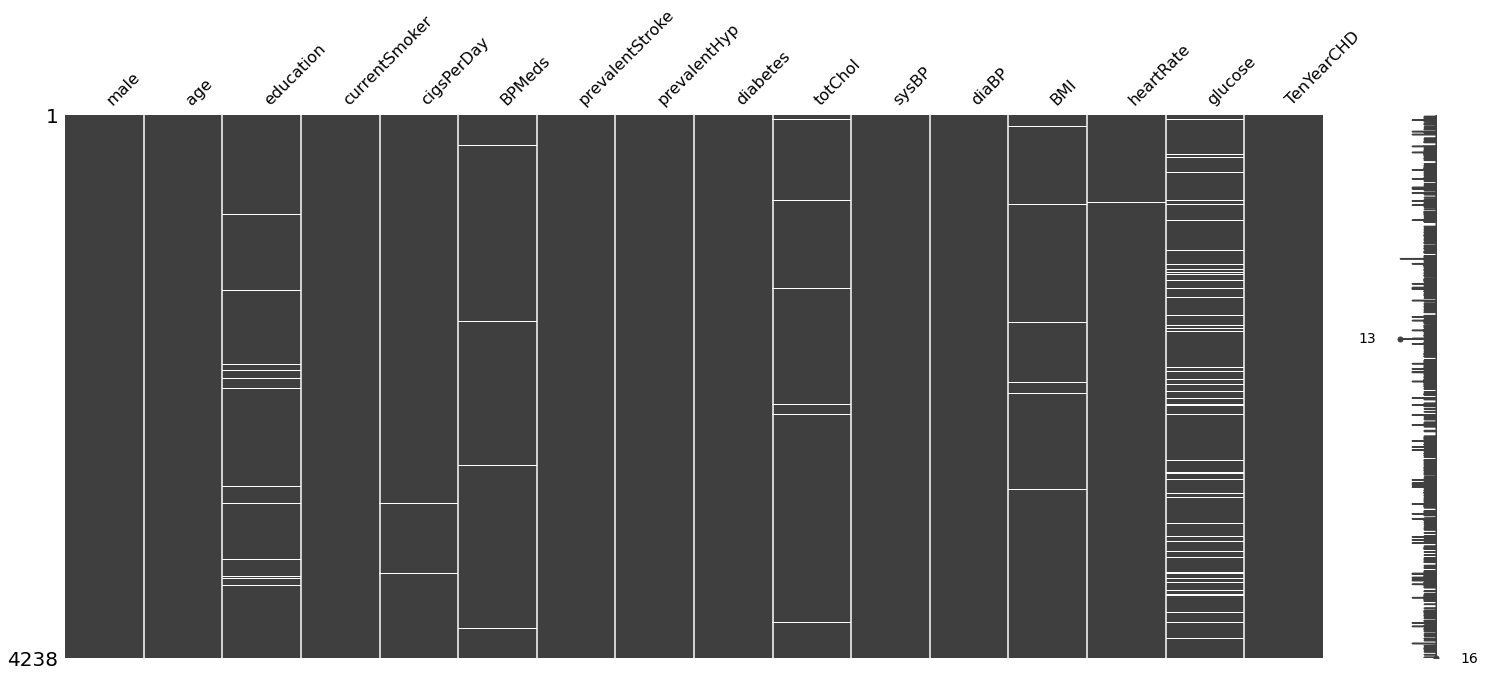

In [4]:
msno.matrix(df)

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

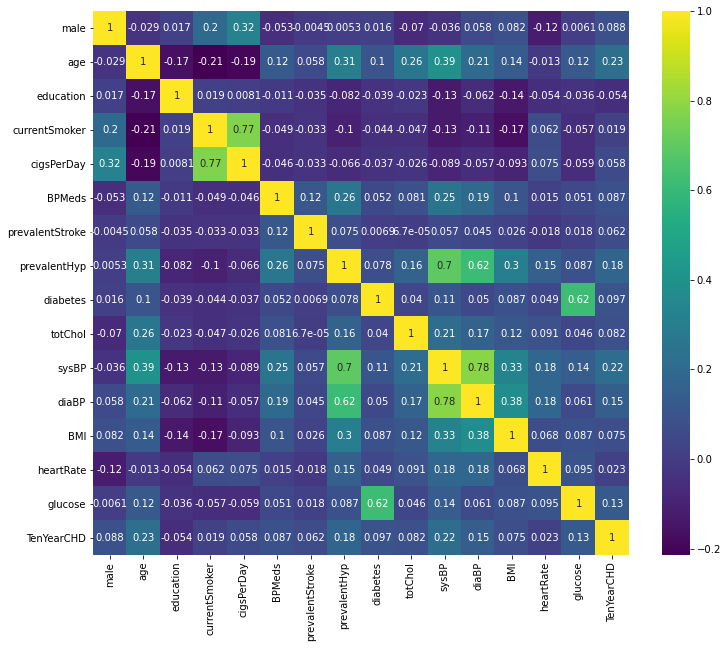

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [7]:
df.drop(['education'],axis=1,inplace=True)

In [8]:
df["glucose"] = df["glucose"].groupby(df["age"]).transform(lambda x: x.fillna(x.mean()))

In [9]:
df["BPMeds"] = df["BPMeds"].groupby(df["age"]).transform(lambda x: x.fillna(x.max()))

In [10]:
df["totChol"] = df["totChol"].groupby(df["age"]).transform(lambda x: x.fillna(x.mean()))

In [11]:
df["BMI"] = df["BMI"].groupby(df["age"]).transform(lambda x: x.fillna(x.mean()))

In [12]:
df["cigsPerDay"] = df["cigsPerDay"].groupby(df["male"]).transform(lambda x: x.fillna(x.mean()))

In [13]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [17]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [26]:
X_train=scaler.fit_transform(X_train)

In [27]:
X_test=scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model=LogisticRegression()

In [28]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred=log_model.predict(X_test)

In [32]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report

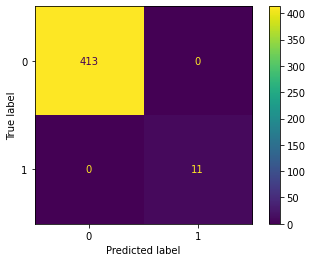

In [33]:
plot_confusion_matrix(log_model, X_test, y_pred)

In [35]:
accuracy_score(y_test,y_pred)

0.8632075471698113

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       357
           1       0.91      0.15      0.26        67

    accuracy                           0.86       424
   macro avg       0.89      0.57      0.59       424
weighted avg       0.87      0.86      0.82       424



In [43]:
from sklearn.metrics import plot_roc_curve

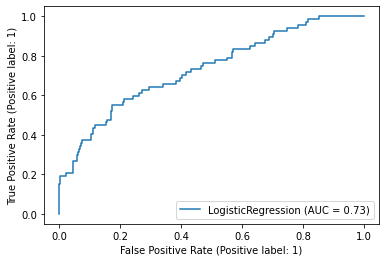

In [44]:
plot_roc_curve(log_model,X_test,y_test)